In [1]:
require('cowplot')
library('ggplot2')
source(file.path('..','commons','get_expected_pval_and_equiv_z.R'))
source(file.path('..','commons','multiplot.R'))
source(file.path('..','commons','plot_lib.R'))
source(file.path('..', 'commons','prepare_data.R'))
source(file.path('..', 'commons','plot_unit_mismatch.R'))
source(file.path('..', 'commons','plot_blandaldman_z.R'))
source(file.path('..', 'commons','plot_grid_methods_color_within.R'))
source(file.path('..', 'commons','plot_qq_p.R'))
theme_set(theme_gray()) # switch to default ggplot2 theme for good

Loading required package: cowplot
Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
# allsimudat_k25_n1000 <- load_data_from_csv('^test1_k025_n1000.*')
# allsimudat_k25_n50 <- load_data_from_csv('^test1_k025_n50_btw1_.*')
# allsimudat_k05_n20 <- load_data_from_csv('^test1_k005_btw1.*')
allsimudat_k25_n20 <- load_data_from_csv('^test1_k025_n20.*')
# allsimudat_k50_n20 <- load_data_from_csv('^test1_k050_btw1_.*')
# allsimudat_k50_n20_btw0 <- load_data_from_csv('^test1_k50_btw0_.*')
# allsimudat_k100_n100 <- load_data_from_csv('^test1_k100_n100_btw1_.*')
allsimudat_k25_n100 <- load_data_from_csv('^test1_k025_n100_.*')

[1] "pattern= test1_k025_n20"
[1] "CSV file /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n20.csv  not found, reprocessing the data."
[1] "^test1_k025_n20.*"
[1] "72 simulations"
[1] "Reading  72  /  72"
[1] "/Volumes/camille/IBMA_simu//test1_k025_n20_btw1_wthdiff16_nominal/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n20.csv"
[1] "Reading  71  /  72"
[1] "/Volumes/camille/IBMA_simu//test1_k025_n20_btw1_wthdiff16_datascl_soft50_002/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n20.csv"
[1] "Reading  70  /  72"
[1] "/Volumes/camille/IBMA_simu//test1_k025_n20_btw1_wthdiff16_datascl_soft20_002/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n20.csv"
[1] "Reading  69  /  72"
[1] "/Volumes/camille/IBMA_simu//test1_k025_n20_btw1_

[1] "pattern= test1_k025_n100_"
[1] "CSV file /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n100_.csv  not found, reprocessing the data."
[1] "^test1_k025_n100_.*"
[1] "43 simulations"
[1] "Reading  43  /  43"
[1] "/Volumes/camille/IBMA_simu//test1_k025_n100_btw1_wthdiff16_nominal/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n100_.csv"
[1] "Reading  42  /  43"
[1] "/Volumes/camille/IBMA_simu//test1_k025_n100_btw1_wthdiff16_datascl_soft50_002/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n100_.csv"
[1] "Reading  41  /  43"
[1] "/Volumes/camille/IBMA_simu//test1_k025_n100_btw1_wthdiff16_datascl_soft20_002/simu_400.csv"
[1] "saved in /Users/cmaumet/Projects/Meta-analysis/dev/zmeta/small_samples/../data/allsimudat_test1_k025_n100_.csv"
[1] "Reading  40  /  43"
[1] "/Volumes/camille/IBMA_simu//test1

In [3]:
allsimudat <- rbind(
#                     allsimudat_k25_n50,
#                     allsimudat_k05_n20, 
                    allsimudat_k25_n20, 
#                     allsimudat_k25_n1000, 
#                     allsimudat_k50_n20
#                     allsimudat_k100_n100,
                    allsimudat_k25_n100
)

In [5]:
allsimudat$withinInfo <- allsimudat$Within/allsimudat$nSubjects
allsimudat$withinInfo[allsimudat$withinVariation!=1] <- paste("varying: ", allsimudat$withinVariation[allsimudat$withinVariation!=1], sep='')
allsimudat$withinInfo <- factor(allsimudat$withinInfo)
levels(allsimudat$withinInfo)

[1] "0.25"        "0.5"         "1"           "2"           "4"          
[6] "varying: 16" "varying: 2"  "varying: 4"  "varying: 8"

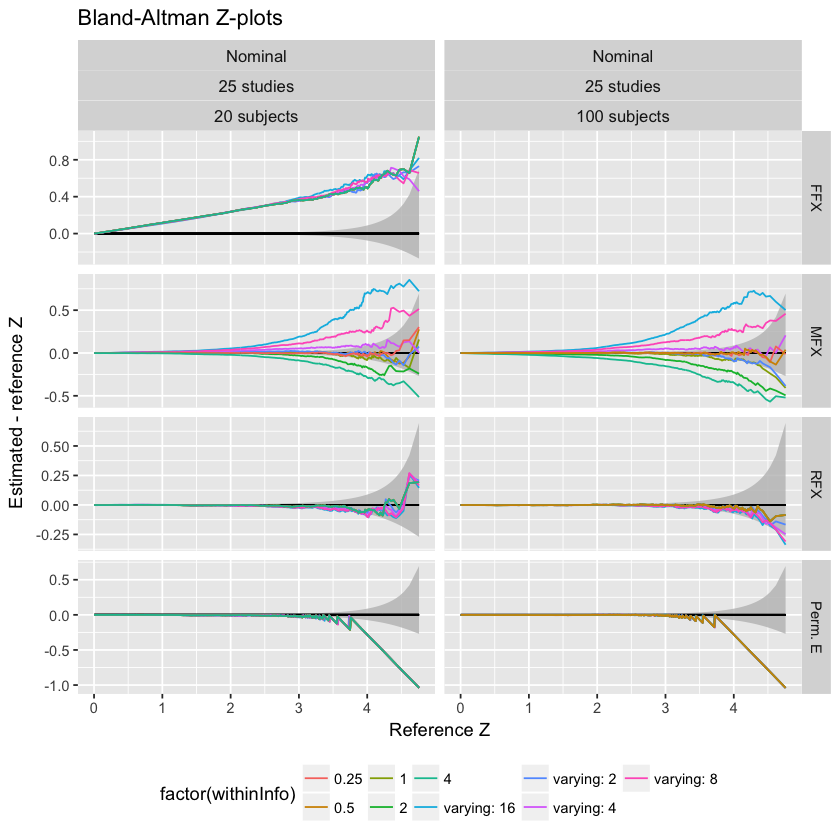

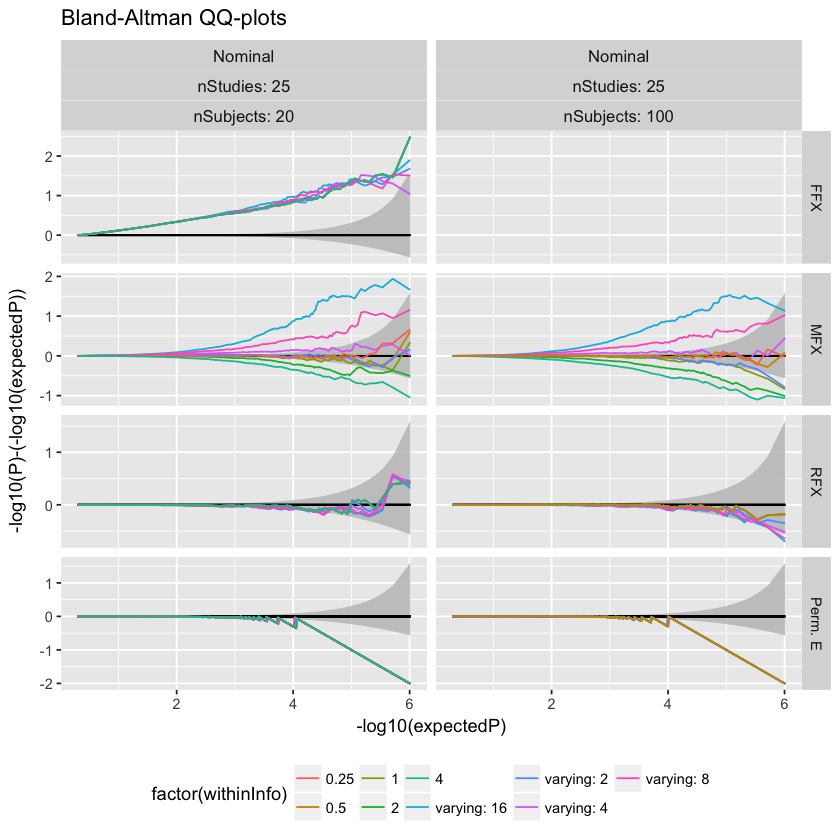

In [7]:
con_methods <- c("megaMFX","megaMFX2","megaRFX","permutCon", "megaFFX_FSL")
con_data_1 <- subset(allsimudat, is.finite(expectedz) & expectedz>0  &  methods %in% con_methods)

best_con_data_1 <- subset(con_data_1, 
    ((methods %in% c("megaMFX") & Between==1) | 
     (methods %in% c("megaRFX") & Between==1)  |
     (methods %in% c("megaMFX2") & Between==1)  |
     (methods %in% c("megaFFX_FSL") & Between==0) |
     (methods %in% c("permutCon"))
    ) & (unitMism=="nominal"))

best_con_data_1_n20 <- subset(best_con_data_1, nSubjects==20)
best_con_data_1_n50 <- subset(best_con_data_1, nSubjects==50)
best_con_data_1_n100_k100 <- subset(best_con_data_1, nSubjects==100)


p <- plot_blandaldman_z(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    title="Bland-Altman Z-plots",
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)
p <- plot_qq_p(
    list(best_con_data_1), 
    formula=methods~unitMism+nStudies+nSubjects, 
    "Bland-Altman QQ-plots", 
    mult=FALSE, 
    lim=NA, max_z=18, filename=NA)

# plot_unit_mismatch(
#     subset(best_con_data_1_n20, ((methods %in% c("megaRFX") & Between==1) | !(methods %in% c("megaRFX")))), 
#     'one-sample test, k=25, n=20', mult=FALSE, single=TRUE, lim=NA, max_z=18)